<center>
<h1><b><i>Mat 120 Lab Project</i></b></h1>
<h2><b>Group- G </h2></b>
</center>



<center> <h1><b><i>Newton's Law of Cooling </i></b></h1></center>

<h5><b><u>Newton's law of cooling is basically:</b></u>  The rate of loss of heat from a body is directly proportional to the difference in the temperature of the body and its surroundings.</h5>

```
dT/dt=-k(T-Ts)

T = Temperature of the body at time t
Ts = Temperature of the surrounding
k = Positive constant that depends on the area and nature of the surface of the body under consideration.
```
<h5><i><b>If we later simplify more we will get a simple Equation such as</b></i></h5>

```
T(t) = Ts + (T0 – Ts).e**(-kt)

or,
T(t)=C1*e**(−kt)+Ts

Where,
t = time
T(t) = Temperature of the given body at time t
Ts = Surrounding temperature
T0 = Initial temperature of the body
k = Constant
C1=T0-Ts
```


In [1]:
#All libraries that needs to be imported
from sympy import *
from numpy import *
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

So we now get Newton's Cooling Formula:



Eq(Derivative(T(t), t), -k*(-Ts + T(t)))


General Solve for the Cooling Equation:



Eq(T(t), C1*exp(-k*t) + Ts)


So the Final Newton's Cooling equation is:



Ts + (T0 - Ts)*exp(-k*t)

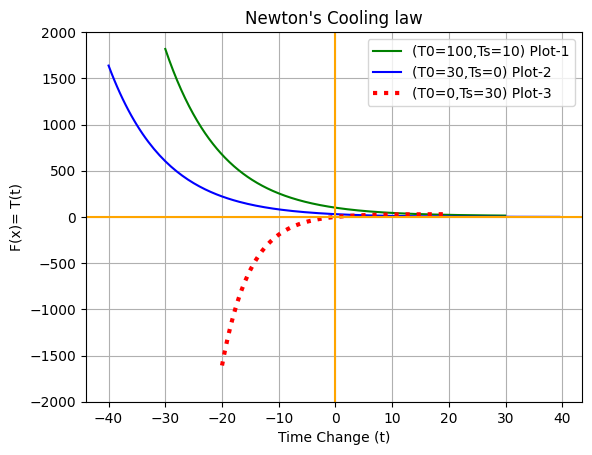

In [2]:
k, t, Ts,T0 = smp.symbols("k, t, Ts,T0")
T = smp.Function("T")(t)           #Making T as a function of time T(t)=Equation
rhs = -k * (T - Ts)
eq = smp.Eq(T.diff(t), rhs)         #making an equation
print("So we now get Newton's Cooling Formula:\n")
display(eq)
print("="*50)
print("\nGeneral Solve for the Cooling Equation:\n")
sol=smp.dsolve(eq,T)                #Solving the eqn Symbolically
display(sol)
print("="*50)
print("\nSo the Final Newton's Cooling equation is:\n")
eqn=smp.simplify((T0-Ts)*smp.exp(-k*t))+Ts
display(eqn)


#======================Plot-1========================================
func=smp.lambdify((T0,Ts,k,t),eqn)
ks=0.1
ts=np.arange(-30,30,0.1)
#print(ts)
To=100
TS=10
temp=func(To,TS,ks,ts)
#========================Plot Part ======================================
plt.plot(ts,temp,c="green",label="(T0=100,Ts=10) Plot-1")  #plot 1



#======================Plot-2========================================
func2=smp.lambdify((T0,Ts,k,t),eqn)
ks=0.1
ts=np.arange(-40,40,0.5)
To=30
TS=0
temp1=func2(To,TS,ks,ts)
#========================Plot Part ======================================
plt.plot(ts,temp1,c="blue",label="(T0=30,Ts=0) Plot-2")  #plot2



#======================Plot-3========================================
func3=smp.lambdify((T0,Ts,k,t),eqn)
ks=0.2
ts=np.arange(-20,20,0.5)
To=0
TS=30
temp2=func3(To,TS,ks,ts)
#========================Plot Part ======================================
plt.plot(ts,temp2,c="red",label="(T0=0,Ts=30) Plot-3",linestyle="dotted", linewidth=3)  #plot3



#======================Editing the plot ==================================
plt.title("Newton's Cooling law")
plt.xlabel("Time Change (t)")
plt.ylabel("F(x)= T(t)")
plt.axhline(y=0,c="orange")
plt.axvline(x=0,c="orange")
plt.legend(loc='best')
plt.grid()
plt.ylim(-2000, 2000)
plt.show()

<h3><i><b>Numerical Solve using Odeint </b></i></h3>

In [3]:
from scipy.integrate import odeint

```
dT/dt=k(T-Ts)

T = Temperature of the body at time t
Ts = Temperature of the surrounding
k = Positive constant that depends on the area and nature of the surface of the body under consideration.
```

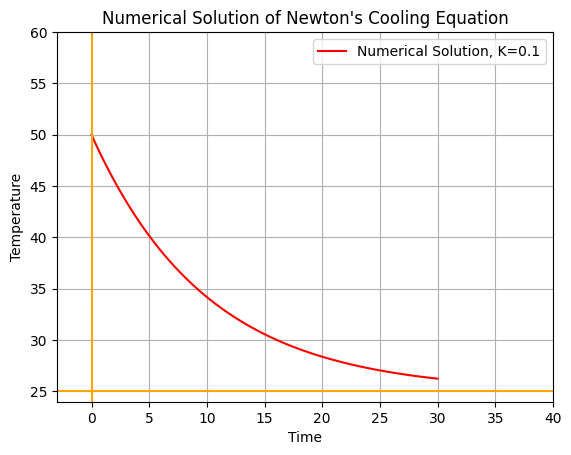

In [4]:
# Setting the Parameters
k= 0.1
Ts = 25
T = 50  # Initial temperature


def odeint_maker(T, t):  #Ode Function
    return -k* (T - Ts)


time_points = np.linspace(0, 30, 100)  #Fixing Time points
#print(time_points)

# Solve for the ODE cooling function Numerical Solve (Odeint)
Numerical_solve = odeint(odeint_maker, T, time_points)

#======================Plot Section================================
plt.plot(time_points, Numerical_solve, label='Numerical Solution, K=0.1',c="red")
plt.title("Numerical Solution of Newton's Cooling Equation")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.axhline(y=25,c="Orange")
plt.axvline(x=0,c="Orange")
plt.legend(loc='best')
plt.grid()
plt.ylim(24, 60)
plt.xlim(-3, 40)
plt.show()

<h3><i><b>Euler's Method ! </b></i></h3>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXzUBhD1PobVnJ8HUfNdVrve3nVeLMn4oUbAtc2V_PfePXituCBDMEft5a3SJfSAQ1S-k&usqp=CAUg"  width="400" height="200">

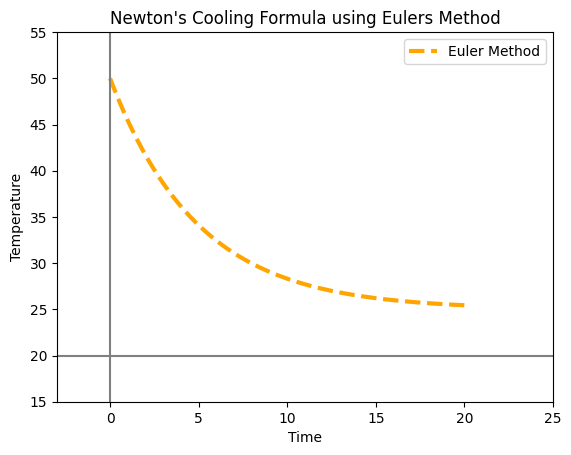

In [5]:
#Solve Using Euler's Method
# ==============Given parameters==========================
k = 0.2                 # Setting  the value of the Constant K
Ts = 25                 # Surrounding Temperature or absorbing temperature
T0 = 50                 # Starting value or body temprerature
t_max = 20              # Maximum time
dell_t = 0.1           # Time step or  in eulars theorem

#Setting the initial Conditions
T = T0
time_values = [0]
temperature_values = [T]     #[50,]


# Apply Euler's method
t = 0
while t < t_max:
    temp = (-k * (T - Ts)) * dell_t       #-0.2*[50-25]*0.1  this decreases as T increases
    T = T + temp                          #temperature reduces as it is an negative exponential graph
    t += dell_t                           #As loop goes on Time increases
    time_values.append(t)                 #storing the values of temp perature T and time t in two separate lists
    temperature_values.append(T)

# print(time_values)
# print(temperature_values)


#===================Plot Part====================================
plt.plot(time_values, temperature_values, label='Euler Method',c="orange",linestyle="dashed",linewidth=3) #dont give a line width of an x>3 looks bad
plt.title("Newton's Cooling Formula using Eulers Method")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.axhline(y=20,c="Grey")
plt.axvline(x=0,c="Grey")
plt.legend(loc='best')
#plt.grid()                #if grid needed un-hash the first Hash
plt.ylim(15, 55)
plt.xlim(-3, 25)
plt.show()

<h2><b>Reference</h2></b>
<ol>
<li><a href="https://byjus.com/jee/newtons-law-of-cooling/">Byjus</a></li>

<li><a href="https://www.khanacademy.org/math/differential-equations/first-order-differential-equations/exponential-models-diff-eq/v/newtons-law-of-cooling#:~:text=Newton's%20law%20of%20cooling%20can,%E2%81%BB%E1%B5%8F%E1%B5%97%20(for%20heating)">Khan Academy</a></li>

<li><a href="https://tutorial.math.lamar.edu/classes/de/eulersmethod.aspx/">Paul's Online Notes</a></li>
</ol>